In [43]:
# https://medium.com/analytics-vidhya/pca-vs-lda-vs-t-sne-lets-understand-the-difference-between-them-22fa6b9be9d0

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# df = pd.read_csv("./cleaned_soccer_data_v1.csv",index_col=0)
df = pd.read_csv("../../datasets/cleaned_soccer_data_2016_v3_with general_labels.csv",index_col=0)
print(df.head())
print(df.columns)
print(df["player_positions_general"])



    id  player_fifa_api_id  player_api_id        date  overall_rating  \
0    1              218353         505942  2016-02-18            67.0   
1    6              189615         155782  2016-04-21            74.0   
2   65              140161          30572  2016-04-21            69.0   
3   88               17725          23780  2015-12-24            70.0   
4  113              158138          27316  2016-04-28            77.0   

   potential  crossing  finishing  heading_accuracy  short_passing  ...  \
0       71.0      49.0       44.0              71.0           61.0  ...   
1       76.0      80.0       53.0              58.0           71.0  ...   
2       69.0      57.0       21.0              68.0           65.0  ...   
3       70.0      46.0       34.0              73.0           65.0  ...   
4       77.0      77.0       72.0              64.0           79.0  ...   

   weight  preferred_foot_left  preferred_foot_right  \
0     187                    0                     1  

In [44]:
player_positions_general = df["player_positions_general"]
player_positions_detailed = df["player_positions"]

df.drop("player_positions_general",1)
ohe_positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
df = df.drop("player_positions",1)
df = df.drop("player_positions_general",1)
player_fifa_id=df["player_fifa_api_id"]
df = df.drop("player_fifa_api_id",1)
df = df.drop("player_api_id",1)
df = df.drop("id",1)
df = df.drop("player_name",1)
df = df.drop("date",1)

In [45]:
# drop if we dont want features in the labels
df = df.drop(ohe_positions,1)

In [46]:
# ensure all columns are numeric
print(df.dtypes)

overall_rating                float64
potential                     float64
crossing                      float64
finishing                     float64
heading_accuracy              float64
short_passing                 float64
volleys                       float64
dribbling                     float64
curve                         float64
free_kick_accuracy            float64
long_passing                  float64
ball_control                  float64
acceleration                  float64
sprint_speed                  float64
agility                       float64
reactions                     float64
balance                       float64
shot_power                    float64
jumping                       float64
stamina                       float64
strength                      float64
long_shots                    float64
aggression                    float64
interceptions                 float64
positioning                   float64
vision                        float64
penalties   

In [47]:
player_positions_general
player_positions_general.unique()

array(['DEF', 'MID', 'ATK', 'GK'], dtype=object)

In [48]:
clf = LinearDiscriminantAnalysis()
df_lda = clf.fit_transform(df,player_positions_general)

df_lda

array([[-3.01321497, -1.88055061, -0.2087121 ],
       [-2.56671684, -2.36417686,  0.33477633],
       [-1.17376065, -2.53869714, -0.21423737],
       ...,
       [-2.22658797,  1.6313626 ,  0.74213551],
       [-1.9134922 ,  1.32497799, -1.57868268],
       [-1.91928653, -2.62293538, -0.57853282]])

In [49]:
df_lda.shape


(6358, 3)

<ipython-input-50-fcb2efb895d5>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def scatter_lda_sns(df,df_pca,num_pc,labels=pd.Series()):


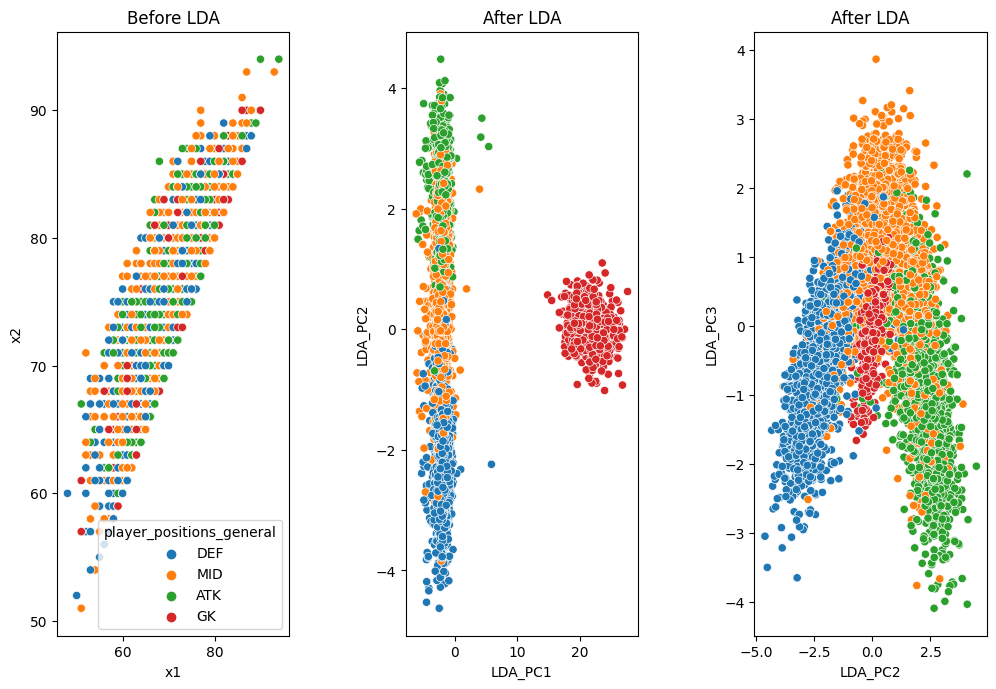

In [50]:
def scatter_lda_sns(df,df_pca,num_pc,labels=pd.Series()):
    fig, axes = plt.subplots(1,num_pc)
    if not labels.empty:
        sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1], hue=labels,ax=axes[0])
    else:
        sns.scatterplot(data=df, x=df.iloc[:,0], y=df.iloc[:,1],ax=axes[0])
    axes[0].set_xlabel('x1')
    axes[0].set_ylabel('x2')
    axes[0].set_title('Before LDA')
    for i in range(1,num_pc):
        if not labels.empty:
            sns.scatterplot(data=df_pca, x=df_pca[:,i-1], y=df_pca[:,i], hue=labels,ax=axes[i],legend=False)
        else:
            sns.scatterplot(data=df, x=df_pca[:,i-1], y=df_pca[:,i],ax=axes[i],legend=False)
        axes[i].set_xlabel('LDA_PC{}'.format(i))
        axes[i].set_ylabel('LDA_PC{}'.format(i+1))
        axes[i].set_title('After LDA')
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    
# scatter_pca_sns(df,df_pca,num_pc,labels=player_positions_detailed)
scatter_lda_sns(df,df_lda,df_lda.shape[1],labels=player_positions_general)

In [ ]:

# def biplot(df,score,coeff,num_pc,labels=None):
#     '''
#     score: the projected data
#     coeff: the eigenvectors (PCs)
#     pcax: pca1 index
#     pcay: pca2 index
#     '''
#     for i in range(0,num_pc-1):
#         pca1=i
#         pca2=i+1
#         xs = score[:,i]
#         ys = score[:,i+1]
#         n=coeff.shape[0]
#         scalex = 1.0/(xs.max()- xs.min())
#         scaley = 1.0/(ys.max()- ys.min())
#         if labels is None:
#             sns.scatterplot(data=score, x=xs*scalex, y=ys*scaley)
#         else:
#             sns.scatterplot(data=score, x=xs*scalex, y=ys*scaley, hue=labels)
#         for j in range(n): #feature explain variance
#             plt.arrow(0, 0, coeff[j,pca1], coeff[j,pca2],color='r',alpha=0.9) 
#             if labels is None:
#                 plt.text(coeff[j,pca1]* 1.15, coeff[j,pca2] * 1.15,  list(df.columns)[j], color='g', ha='center', va='center')
#             else:
#                 plt.text(coeff[j,pca1]* 1.15, coeff[j,pca2] * 1.15, list(df.columns)[j], color='g', ha='center', va='center')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.xlabel("LDA_PC{}".format(pca1+1))
#         plt.ylabel("LDA_PC{}".format(pca2+1))
#         plt.grid()
#         plt.show()

# # Call the biplot function for any number of PCs
# biplot(df,df_pca, np.transpose(pca.components_),df_pca.shape[1],player_positions_general)


In [51]:
columns=["LDA_PC{}".format(i) for i in range(1,df_lda.shape[1]+1)]
df_lda = pd.DataFrame(df_lda,columns=columns,index=df.index)
print(df_lda.head())

    LDA_PC1   LDA_PC2   LDA_PC3
0 -3.013215 -1.880551 -0.208712
1 -2.566717 -2.364177  0.334776
2 -1.173761 -2.538697 -0.214237
3 -1.832056 -2.653320 -1.100936
4 -1.364683  2.168054  0.514098


In [52]:
df_final = df_lda
df_final["player_fifa_api_id"]=player_fifa_id
df_final["player_positions"] = player_positions_detailed
df_final["player_positions_general"] = player_positions_general
df_final

,LDA_PC1,LDA_PC2,LDA_PC3,player_fifa_api_id,player_positions,player_positions_general
0,-3.013215,-1.880551,-0.208712,218353,CB,DEF
1,-2.566717,-2.364177,0.334776,189615,LB,DEF
2,-1.173761,-2.538697,-0.214237,140161,RB,DEF
3,-1.832056,-2.653320,-1.100936,17725,CB,DEF
4,-1.364683,2.168054,0.514098,158138,LM,MID
...,...,...,...,...,...,...
6353,-2.709630,1.991691,0.667729,179712,CAM,MID
6354,-2.385366,0.698882,-1.296286,219943,ST,ATK
6355,-2.226588,1.631363,0.742136,105454,RM,MID
6356,-1.913492,1.324978,-1.578683,195840,LW,ATK
